In [1]:
%matplotlib inline
from mocpy import MOC
from astropy.io import fits

import astropy.units as u
from astropy.coordinates import SkyCoord, Angle

In [2]:
image_path = '../resources/image_with_mask.fits.gz'

with fits.open(image_path) as hdulist:
    moc = MOC.from_image(header=hdulist[0].header,
                         max_norder=10,
                         mask_arr=hdulist[0].data)

/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/baumann/.local/lib/python3.6/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]


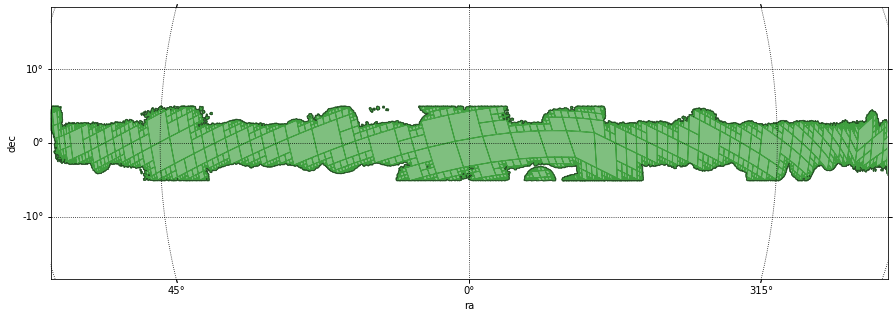

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(111, figsize=(15, 5))

from mocpy import WCS

from astropy.coordinates import Angle
with WCS(fig, 
         fov=110 * u.deg,
         center=SkyCoord(0, 0, unit='deg', frame='galactic'),
         coordsys="galactic",
         rotation=Angle(0, u.degree),
         projection="SIN") as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    moc.fill(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="green")
    moc.border(ax=ax, wcs=wcs, alpha=0.5, fill=True, color="black")

plt.xlabel('ra')
plt.ylabel('dec')
plt.grid(color="black", linestyle="dotted")